# Sujet 2 : le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle

Le but de ce travail est de reproduire le [graphique](https://fr.wikipedia.org/wiki/William_Playfair#/media/File:Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat,_and_Wages_of_Labour_by_the_Week,_from_1565_to_1821.png) de William Playfair qui montre l'évolution du prix du blé et du salaire moyen entre 1565 et 1821. Ce graphique est publié dans son [livre](https://books.google.fr/books?id=aQZGAQAAMAAJ&printsec=frontcover&hl=fr&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false) : "A Letter on Our Agricultural Distresses, Their Causes and Remedies".

Les données numériques brutes que William Playfair a utilisées ne sont malheureusement pas disponible. Des valeurs obtenues par numérisation du graphe sont toutefois disponible [ici](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Wheat.html). Nous utiliserons ici la [version en format CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv).

## 1. Téléchargement des données

Nous vérifions dans un premier temps que les données ne sont pas déjà présente dans un fichier local. Si ce n'est pas le cas, nous effectuons une copie des données dans un fichier local qui servira dans la suite des analyses
Les données disponible et réalisons une copie locale de ces données

Le but de la manoeuvre est de permettre d'accèder aux données ultérieurement même si le lien initiale des données est modifié (suppression ou modification)ou que les données utilisée venaient à être modifiée (avec une nouvelle numérisation du graphique par exemple).

In [2]:
data_url='https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv'

In [4]:
import os
import urllib.request
fileName = 'data_william.csv'
if not os.path.exists(fileName):
    print('Aucun fichier local avec les données étudiées n\'est disponible. Un nouveau fichier est fabriqué à partir du lien donné')
    urllib.request.urlretrieve(data_url, fileName) 

Aucun fichier local avec les données étudiées n'est disponible. Un nouveau fichier est fabriqué à partir du lien donné


Nous pouvons à présent ouvrir le fichier local et travailler avec celui-ci tout au long de l'étude.
La première colonne correspond à l'ID. Nous avons dès lors décidé de passer cette colonne comme index (au moins dans un premier temps)

In [7]:
import pandas as pd
raw_data = pd.read_csv(fileName,index_col=0)
raw_data

Year  Wheat  Wages
1   1565   41.0   5.00
2   1570   45.0   5.05
3   1575   42.0   5.08
4   1580   49.0   5.12
5   1585   41.5   5.15
6   1590   47.0   5.25
7   1595   64.0   5.54
8   1600   27.0   5.61
9   1605   33.0   5.69
10  1610   32.0   5.78
11  1615   33.0   5.94
12  1620   35.0   6.01
13  1625   33.0   6.12
14  1630   45.0   6.22
15  1635   33.0   6.30
16  1640   39.0   6.37
17  1645   53.0   6.45
18  1650   42.0   6.50
19  1655   40.5   6.60
20  1660   46.5   6.75
21  1665   32.0   6.80
22  1670   37.0   6.90
23  1675   43.0   7.00
24  1680   35.0   7.30
25  1685   27.0   7.60
26  1690   40.0   8.00
27  1695   50.0   8.50
28  1700   30.0   9.00
29  1705   32.0  10.00
30  1710   44.0  11.00
31  1715   33.0  11.75
32  1720   29.0  12.50
33  1725   39.0  13.00
34  1730   26.0  13.30
35  1735   32.0  13.60
36  1740   27.0  14.00
37  1745   27.5  14.50
38  1750   31.0  15.00
39  1755   35.5  15.70
40  1760   31.0  16.50
41  1765   43.0  17.60
42  1770   47.0  18.50
43  1775   44.0  19.50
44  1780   46.0  21.00
45  1785   42.0  23.00
46  1790   47.5  25.50
47  1795   76.0  27.50
48  1800   79.0  28.50
49  1805   81.0  29.50
50  1810   99.0  30.00
51  1815   78.0    NaN
52  1820   54.0    NaN
53  1821   54.0    NaN

### Informations relatives aux données:
Il s'agit d'une base de données avec 53 observations sur les 3 variables suivantes:
* Year = années espacée de 5 ans entre 1565 et 1821
* Wheat = prix du blé (shillings pour un quart de boisseau de blé)
* Wages = salaires hebdomadaire (shillings par semaine)

**Remarques**
* Jusqu'en 1971, la livre sterling était divisée en 20 shillings, et un shilling en 12 pences.
* Le prix du blé est donné en shillings pour un quart de boisseau de blé. Un quart de boisseau équivaut 15 livres britanniques ou 6,8 kg.
* Les salaires sont donnés en shillings par semaine.

In [21]:
type(raw_data['Year'][1])

numpy.int64

Afin de pouvoir réaliser des graphique numérique des données, nous convertissons les date en format datetime compatible avec les graphique matplotlib


In [92]:
import datetime
year=[]
year=[datetime.date(raw_data['Year'][i+1],1,1)for i in range(0,len(raw_data['Year'])-1)]
width=[(year[j+1]-year[j]).days for j in range(0,len(year)-1)]
width.append(365)

(21.0, 100)

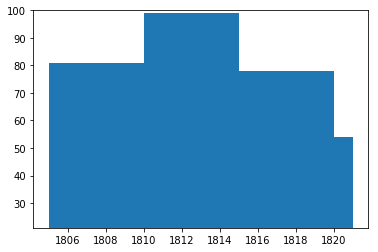

In [93]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
plt.bar(year[48:52],raw_data['Wheat'][48:52],align='edge',width=width[48:52])
ax.xaxis_date()
plt.ylim(raw_data['Wheat'].min()-5,100)